In [19]:
import yfinance as yf
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
#Load Data
ticker = "AAPL"
start = "2020-01-01"
end = date.today().strftime("%Y-%m-%d")

df = yf.download(ticker,start=start, end=end, auto_adjust=True)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200
...,...,...,...,...,...
2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800


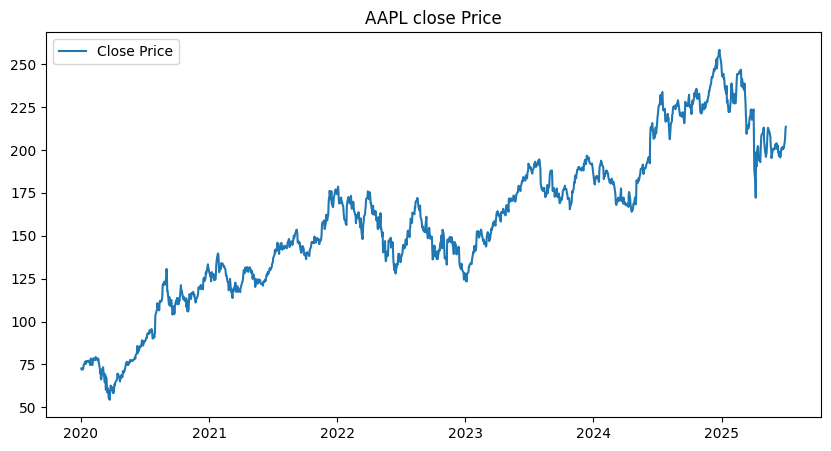

In [21]:
#Plot
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} close Price')
plt.legend()
plt.savefig('Stock Predict.jpg')
plt.show()

In [22]:
# Prepare data
df = df.reset_index()
df['Date'] = df["Date"].map(pd.Timestamp.toordinal)

X = df[['Date']]
y = df['Close']

model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
# Predict next day
next_day = [[date.today().toordinal()+1]]
predicted = model.predict(next_day)
print(f'Predicted Close Price for next day : ${predicted[0][0]:.2f}')



Predicted Close Price for next day : $228.92
